
# `import`ステートメント

`import`ステートメントはコードの冒頭にあり、Python に外部モジュールをロードするように指示している。この場合、NetworkX をロードしたいのだが、繰り返し入力する必要があるため、`as`ステートメントを使用してエイリアス（短い別名）`nx`をつける。

 `%`記号で始まる行は Python のコードではなく、Jupyter ノートブックの「魔法」コマンドである。 `%matplotlib inline`というコマンドは、Jupyter Notebook にインラインで、つまりノートブック内にグラフィックを描画するように指示する。このコマンドは、import ステートメントの直後に用いなければならない。



# 第 1 章

NetworkX を使用して、重み付き・重みなしエッジを使用して、無向・有向のグラフを構築および描画でき、グラフを分析するための一連の関数も利用可能である。このチュートリアルでは、いくつかの基本的な例を演習で説明する。

多くの演習ブロックの後には、いくつかの `assert` ステートメントを含むブロックが続くことに注意させたい。これらのアサーションの前に、セットアップ・コードが表示される場合もある。これらは、あなたが正しい道を進んでいるかというフィードバックを提供するためのものである。`AssertionError` が発生する場合、恐らくあなたは何か間違ったことをしたかもしれない。

## このチュートリアルで使用されるバージョンの公式ドキュメント

[https://networkx.github.io/documentation/networkx-2.2/](https://networkx.github.io/documentation/networkx-2.2/)

## このチュートリアルで使用されるバージョンの公式チュートリアル

[https://networkx.github.io/documentation/networkx-2.2/tutorial.html](https://networkx.github.io/documentation/networkx-2.2/tutorial.html)


In [ ]:
import networkx as nx
%matplotlib inline


まずはインストールされている NetworkX のバージョンを確認しよう。バージョン2 は 1 と互換性がないため、旧式のものを使用していないかを確認したい。


In [2]:
nx.__version__


# 無向グラフの作成と描画


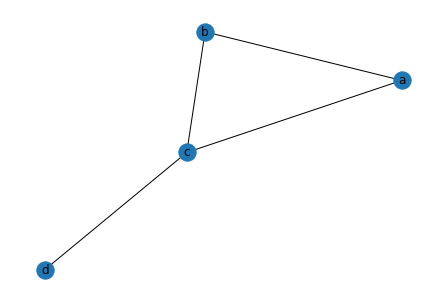

In [3]:
# グラフ（Graph)はデフォルトで方向性をもたない
G = nx.Graph()

# それぞれのノードに名前を付ける。今回はアルファベットの名前をつける
G.add_node('a')

# add_nodes_from メソットはシーケンス（この場合は リスト）よりノードを加えることができる
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# ノード 'a' と 'b' の間にエッジを加える
# このグラフは無向グラフであるため、ノードの順序は無関係である
G.add_edge('a', 'b')

# add_nodes_from　同様に、シーケンスからエッジを加えることもできる
# エッジは 2 要素のタプルで指定される
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# グラフを描画する
nx.draw(G, with_labels=True)


外観をカスタマイズするため、`draw` 関数には多数のオプション引数がある。


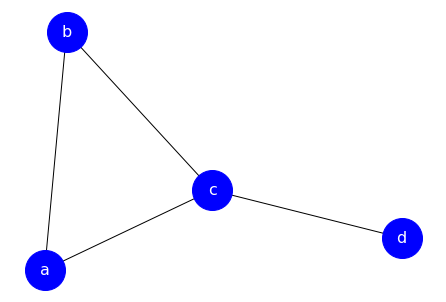

In [4]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )


# 命名規則に関する注意

一般的にPython では、変数は`snake_case`で、つまり、単語をアンダースコアで区切った小文字で表す。クラス名は従来通りに`CamelCase`で、つまり、各単語の最初の文字が大文字で表される。

NetworkX はこの慣例に従わず、多くの場合、グラフの名前に一文字の大文字を使用する。これは、離散数学の慣例にしたがった規則の一例である。オンラインで見つけられるドキュメントのほとんどはこの規則を使用しているので、本書もそれに従う。



# グラフのメゾット

`Graph` オブジェクトには、グラフ全体に関するデータを提供するいくつかのプロパティとメソッドがある。


In [5]:
# 全てのノードを列挙する
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [6]:
# 全てのエッジを列挙する
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])


`NodeView` および `EdgeView` オブジェクトにはイテレータがあるため、それらを `for` ループで使用できる。


In [7]:
for node in G.nodes:
    print(node)

a
b
c
d


In [8]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')



エッジは、入力と同様、 2 要素のタプルとして与えられることに注意しよう。

 `number_of_` メソッドを使用して、グラフ内のノードとエッジの数を取得できる。


In [9]:
G.number_of_nodes()

4

In [10]:
G.number_of_edges()

4


一部のグラフメソッドは、エッジまたはノードを引数として指定することができる。これらは、特定のエッジまたはノードのグラフプロパティを提供する。例えば、 `.neighbors()` メソッドは、指定されたノードにリンクされたノードを提供する。


In [11]:
# ノード 'b' の近隣ノードのリスト
G.neighbors('b')


パフォーマンス上の理由から、多くのGraphメソッドはリストではなくイテレータを返す。それらはループするのに便利である:


In [12]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c



なお、イテレータからリストオブジェクトを作成するためにいつでも`list`コンストラクターを使用できる。


In [13]:
list(G.neighbors('b'))

['a', 'c']


# NetworkX 関数とグラフメソッド

これまでのデータは、グラフ*メソッド*を介して利用でき、次のようにしてグラフオブジェクトから呼び出すことができる。

    G.<メソット名>(<引数>)

最もよく使用される NetworkX の関数のいくつかはメソッドとして提供されているが、さらに多くのものはモジュール関数であり、次のように呼び出される。

    nx.<関数名>(G, <引数>)

つまり、グラフが最初の、そしておそらく唯一の引数として提供される。グラフに関する情報を提供する NetworkX モジュール関数の例をいくつか示したい。


In [14]:
nx.is_tree(G)

False

In [15]:
nx.is_connected(G)

True


# ノードとエッジの存在性

ノードがグラフ中に存在するかどうかを確認するには、 `has_node()`メソッドが使用できる。


In [16]:
G.has_node('a')

True

In [17]:
G.has_node('x')

False


さらに、上記のループ構文: `for n in G.nodes`は、ノードがグラフ内にあるかどうかを確認する別の方法を示唆している。


In [18]:
'd' in G.nodes

True


同様に、2 つのノードがエッジで接続されているかどうかを確認できる。


In [19]:
G.has_edge('a', 'b')

True

In [20]:
G.has_edge('a', 'd')

False

In [21]:
('c', 'd') in G.edges

True


# ノード次数

グラフ内のノードについて問われる最も重要な項目の 1 つは、そのノードが他のノードと接続しているの数、つまりノードの次数である。上記の`.neighbors()`メソッドを使用すると、この問いを次のように定式化できる。


In [22]:
len(list(G.neighbors('a')))

2


しかし、これは非常に一般的なタスクであるため、NetworkX はこれをより明確な方法で行うためのグラフメソッドを提供している。


In [23]:
G.degree('a')

2


# 演習 1

木の構造では多くの場合、、次数 1 のノードは*リーフ*とよばれる。グラフを引数とし、ノードをループし、次数 1 のノードのリストを返す関数 `get_leaves` を作成せよ。


In [ ]:
def get_leaves(G):


In [ ]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])
assert set(get_leaves(G)) == {'c', 'b'}


# 番外編：理解

シーケンスの各項目にある種の演算を適用して新しいシーケンスを生成したい場合がよくある。リスト内包表記 (list comprehension) とジェネレーター式 (generator expression) は、これを行うための手軽な方法である。

リスト内包表記は角括弧の中で指定され、即座に結果リストを生成する。


In [26]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']


NetworkX では、ノードまたはエッジのリストで何かを行うためによく使用される。


In [27]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'd', 'c']
[2, 1, 2, 1]



ジェネレータ式は、[遅延](https://en.wikipedia.org/wiki/Lazy_evaluation)評価されるため、わずかに異なる。これらは丸括弧で指定され（関数の引数として表現されている場合は括弧なしでもよい）。 これらは`max`関数のような、集計の場面で最もよく使用される。


In [28]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [29]:
max(len(item) for item in items)

6

In [30]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']


# ノード名

ノード名は必ずしも 一文字であるとは限らず、文字列や整数など、任意の不変オブジェクトにすることができ、それらを混在させることもできる。以下の例では、名前に文字列と整数を使用している。


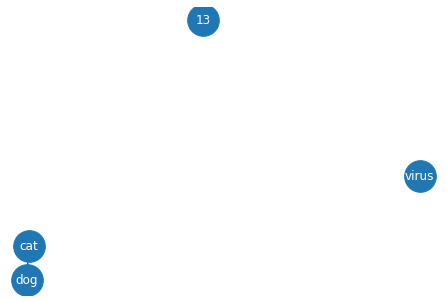

In [31]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)


# 隣接リスト

グラフをコンパクトに表す方法の一つが、隣接リストである。これは、重み無しの有向または無向グラフに最も有効である。隣接リストでは、各行にいくつかのノード名が含まれており、最初のノード名はエッジの「始点」で、行の他の各ノード名はその「終点」である。例えば、次のような隣接リストがあるとする。
```
a d e
b c
c
d
e
```
この隣接リストで表されるグラフのエッジは次のとおりである。
```
(a, d)
(a, e)
(b, c)
```
それぞれの行にノードが存在するため、シングルトンノードを確実に含めることができる。グラフが無向の場合、エッジに任意の一方向のみ指定する必要がある。重要なのは、グラフが有向か無向かの情報がファイル自体に含まれていないことが多く、推測する必要があるということである。これは、隣接リスト形式の限界の一つである。

 `datasets`ディレクトリには、 `friends.adjlist`というファイルがあり、プレーンのテキストファイルなので、パソコンでもGitHubでも開ける。そのファイルの内容は以下の通りである。


In [32]:
print(open('../datasets/friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly




NetworkX には、隣接リストからグラフを読み取る方法：`nx.read_adjlist()` が提供される。このグラフをソーシャルグラフの略語として SG と名付ける。


In [33]:
SG = nx.read_adjlist('../datasets/friends.adjlist')


このグラフの描き方はすでにわかっている：


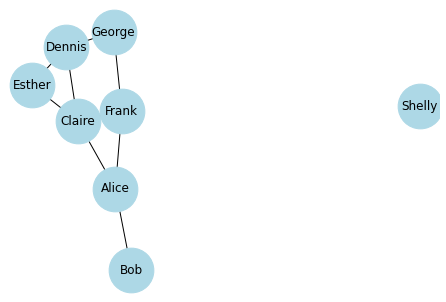

In [34]:
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True)


さらに、ノードからリンクされている友達の数などの情報を取得する方法もわかっている。


In [35]:
SG.degree('Alice')

3


# 演習 2

引数としてグラフを取り、次数が最も高いノードの名前と次数を含む 2 要素のタプルを返す関数 `max_degree` を作成せよ。


In [ ]:
def max_degree(G):
    

In [ ]:
SG = nx.read_adjlist('../datasets/friends.adjlist')
assert max_degree(SG) == ('Claire', 4)


# 演習 3

グラフと 2 つのノードを引数として取り、与えられた両方のノードにリンクされているノードのリスト (またはセット) を返す関数 `mutual_friends` を作成せよ。例えば、上に描いたグラフ`SG`では、

    mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

となるはずである。なお、2 つのノードに相互の友人がいない場合（例えば、上に描かれた `SG` の George と Bob）、空のリストまたはセットが返される。


In [ ]:
def mutual_friends(G, node_1, node_2):

In [ ]:
SG = nx.read_adjlist('../datasets/friends.adjlist')
assert mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
assert mutual_friends(SG, 'George', 'Bob') == []
assert sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']


# 有向グラフ

特に指定がない限り、グラフのエッジは無向だと仮定する、つまり、対称的であり、双方向に行けると想定する。しかし、捕食者と被食者の関係など、一部の関係は非対称であり、有向グラフとして表現するのが最適である。 NetworkX は、有向グラフ用の `DiGraph` クラスを提供する。


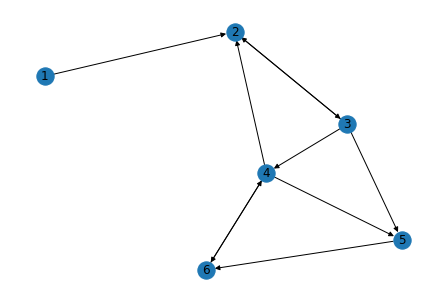

In [38]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)


`has_edge()` などのエッジを扱うグラフメソッドの非対称性に注意してほしい。


In [39]:
D.has_edge(1,2)

True

In [40]:
D.has_edge(2,1)

False

有向グラフのノードは、対称的な関係の”neighbors”の代わりに、先行ノード”in-neighbors”と後続ノード（"out-neighbors"）がある。


In [41]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]



有向グラフには入次数と出次数の概念があり、所与のノードに入ってくるエッジ数とそのノードから出ていくエッジ数をそれぞれ表す。


In [42]:
D.in_degree(2)

3

In [43]:
D.out_degree(2)

1


### 注意事項

NetworkX 2 以降、有向グラフの `.degree()` メソッドは合計次数 (入次数と出次数) を返す。ただし、少し紛らわしい命名法であるが、 `neighbors` メソッドは `successors` の同義語であり、指定されたノードの後続ノードのみ与える。エッジをたどって特定のノードから到達可能なすべてのノードを `neighbors` と見なす場合、これは理にかなっている一方、先行ノードであり後続ノードでもある隣接ノードのシーケンスを返す `.neighbors()` メゾットと混同しないでほしい。


In [44]:
D.degree(2)

4

In [45]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]
